In [19]:
from sklearn.preprocessing import StandardScaler
import glob
import pandas as pd
path = r'C:/Users/Pradeep/Downloads/Colab/Data/Drowsy_one_minute'
all_files = glob.glob(path + "/*.csv")
column_names = ['EAR', 'MAR', 'CIR', 'MOE', 'PITCH', 'ROLL', 'YAW']
std = StandardScaler(with_mean=False)
temp = []
for filepath in all_files:
    df = pd.read_csv(filepath, index_col=None, header=None, nrows = 60)
    Subject_number = filepath[-19:-17]
    if df.shape[0] == 60:
        df.columns = column_names
        scaled_features = StandardScaler().fit_transform(df.values)
        scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
        scaled_features_df['Subject'] = int(Subject_number)
        temp.append(scaled_features_df)
    
df_drowsy = pd.concat(temp, axis=0, join='inner', ignore_index=True)
df_drowsy['Label'] = 1
print(df_drowsy.shape)


(8220, 9)


In [20]:
df_drowsy.head()

,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
0,0.107893,0.978649,1.053758,0.063157,-0.465453,-1.491585,0.872040,2,1
1,-0.003794,0.432203,0.667840,0.006524,-0.747395,-0.547344,0.376567,2,1
2,0.728564,1.081863,0.935135,-0.314902,-1.248267,-0.351353,0.216903,2,1
3,0.974509,0.461199,1.484592,-0.598903,-0.415406,-0.607150,0.349127,2,1
4,-1.410185,0.863108,-0.820666,1.287841,0.514643,-1.407279,0.586334,2,1


In [21]:
df_drowsy.describe()

,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
count,8.220000e+03,8.220000e+03,8.220000e+03,8.220000e+03,8.220000e+03,8.220000e+03,8.220000e+03,8220.000000,8220.0
mean,3.506252e-17,-3.525431e-16,1.032021e-16,3.219917e-17,2.295541e-16,2.860648e-17,-6.801804e-17,28.802920,1.0
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,17.968964,0.0
min,-6.114613e+00,-7.430445e+00,-5.030612e+00,-3.144369e+00,-7.651078e+00,-6.586127e+00,-7.657203e+00,2.000000,1.0
25%,-4.950919e-01,-6.105038e-01,-6.021711e-01,-5.720772e-01,-5.832614e-01,-5.442612e-01,-5.633019e-01,14.000000,1.0
50%,1.218295e-01,-1.199911e-02,7.516024e-02,-1.968398e-01,-2.862467e-02,2.499796e-02,-4.369160e-03,24.000000,1.0
75%,6.304838e-01,5.955847e-01,6.678590e-01,3.307964e-01,5.690954e-01,5.883654e-01,5.543230e-01,48.000000,1.0
max,3.951336e+00,6.766312e+00,4.627968e+00,7.088798e+00,7.162632e+00,7.535954e+00,7.195705e+00,60.000000,1.0


In [22]:
Total_subjects = len(df_drowsy['Subject'].value_counts())
print('{0} Subjects'.format(Total_subjects))
df_drowsy.head()

35 Subjects


,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
0,0.107893,0.978649,1.053758,0.063157,-0.465453,-1.491585,0.872040,2,1
1,-0.003794,0.432203,0.667840,0.006524,-0.747395,-0.547344,0.376567,2,1
2,0.728564,1.081863,0.935135,-0.314902,-1.248267,-0.351353,0.216903,2,1
3,0.974509,0.461199,1.484592,-0.598903,-0.415406,-0.607150,0.349127,2,1
4,-1.410185,0.863108,-0.820666,1.287841,0.514643,-1.407279,0.586334,2,1


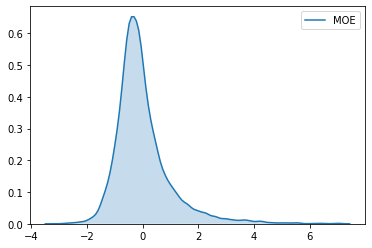

In [12]:
import seaborn as sns
sns.kdeplot(df_drowsy.MOE, shade=True);

In [ ]:

# sns.set_style('whitegrid')
# sns.FacetGrid(df, hue = 'Label', height = 5).map(sns.distplot, 'EAR').add_legend()
# plt.show()

In [ ]:
# sns.pairplot(df, hue="Label", height=3);
# plt.show()
# plt.savefig('Distribution.png')

In [ ]:

# # Plotting Correlation Heatmap
# corrs = df.corr()
# figure = ff.create_annotated_heatmap(
#     z=corrs.values,
#     x=list(corrs.columns),
#     y=list(corrs.index),
#     annotation_text=corrs.round(2).values,
#     showscale=True)
# offline.plot(figure,filename='corrheatmap_dataset_1.html')

In [ ]:
# ## PCA visualisation

# # Dividing dataset into label and feature sets
# X_pca = df.drop('Label', axis = 1) # Features
# Y_pca = df['Label'] # Labels

# print(X_pca.shape)
# print(Y_pca.shape)

# # Normalizing numerical features so that each feature has mean 0 and variance 1
# feature_scaler = StandardScaler()
# X_scaled = feature_scaler.fit_transform(X_pca)

# # Implementing PCA to visualize dataset
# pca = PCA(n_components = 2)
# pca.fit(X_scaled)
# dim_pca = pca.transform(X_scaled)
# print("Variance explained by both pca components: ",pca.explained_variance_ratio_)
# print("Total variance explained by pca components: ",sum(pca.explained_variance_ratio_))

# plt.figure(figsize = (8,6))
# plt.scatter(dim_pca[:,0], dim_pca[:,1], c=Y_pca, cmap='plasma')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()

In [4]:
import glob
path = r'C:/Users/Pradeep/Downloads/Colab/Data/Drowsy'
all_files = glob.glob(path + "/*.csv")
Drowsy = []
for file in all_files:
    Drowsy.append(int(file[-6:-4]))
    print("Rows Counted {} in the csv {}:".format(len(open(file).readlines()) - 1, file[-6:-4])) 

Rows Counted 299 in the csv 02:
Rows Counted 299 in the csv 03:
Rows Counted 299 in the csv 04:
Rows Counted 240 in the csv 09:
Rows Counted 299 in the csv 10:
Rows Counted 299 in the csv 11:
Rows Counted 278 in the csv 12:
Rows Counted 241 in the csv 14:
Rows Counted 299 in the csv 16:
Rows Counted 279 in the csv 17:
Rows Counted 299 in the csv 18:
Rows Counted 299 in the csv 19:
Rows Counted 299 in the csv 21:
Rows Counted 299 in the csv 22:
Rows Counted 299 in the csv 24:
Rows Counted 299 in the csv 27:
Rows Counted 299 in the csv 28:
Rows Counted 299 in the csv 29:
Rows Counted 299 in the csv 30:
Rows Counted 299 in the csv 32:
Rows Counted 299 in the csv 34:
Rows Counted 299 in the csv 35:
Rows Counted 299 in the csv 36:
Rows Counted 299 in the csv 39:
Rows Counted 299 in the csv 40:
Rows Counted 299 in the csv 41:
Rows Counted 299 in the csv 46:
Rows Counted 299 in the csv 50:
Rows Counted 299 in the csv 52:
Rows Counted 280 in the csv 53:
Rows Counted 299 in the csv 54:
Rows Cou

In [8]:
list1_as_set = set(Alert)
intersection = list1_as_set.intersection(Drowsy)
# Find common elements of set and list

intersection_as_list = list(intersection)

print(intersection_as_list)

[2, 9, 10, 11, 12, 16, 17, 18, 19, 22, 24, 29, 32, 34, 35, 36, 39, 40, 41, 46, 50, 52, 53, 54, 56, 57, 59]
